In [2]:
import pandas as pd
from common import collect_results
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
ROOT = Path("scalability")

def get_matcher(prefix):
    def matcher(p: Path):
        import re
        pattern = re.compile(prefix + r"-regions(\d+)-hot(\d+)-(\w)-mr(\d+)-([\d-]+)")
        match = pattern.match(p.name)
        if not match:
            return None

        print("Found result:", p.name)
        hot = int(match.group(2))
        return {
            "regions": int(match.group(1)),
            "hot": 1000000 if hot == 0 else hot,
            "workload": str(match.group(3)),
            "mr": int(match.group(4)),
            "suffix": str(match.group(5)),
        }
    
    return matcher

In [4]:
RENEW_CACHE = False

sunstorm_matcher = get_matcher("scalability-sunstorm")
sunstorm_throughput_df = collect_results(
    ROOT / "sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)
sunstorm_throughput_df["system"] = "sunstorm"

aurora_matcher = get_matcher("scalability-aurora")
aurora_throughput_df = collect_results(
    ROOT / "aurora",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_throughput_df["system"] = "aurora"

yugabyte_matcher = get_matcher("scalability-yugabyte")
yugabyte_throughput_df = collect_results(
    ROOT / "yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
yugabyte_throughput_df["system"] = "yugabyte"


In [5]:
throughput_df = pd.concat([
    sunstorm_throughput_df,
    aurora_throughput_df,
    yugabyte_throughput_df,
])
throughput_df

,path,region,regions,hot,workload,mr,suffix,rejected,rejected.WorkloadF1,aborted,...,p50.WorkloadF6,p75.WorkloadF6,p90.WorkloadF6,p95.WorkloadF6,p99.WorkloadF6,p100.WorkloadF6,system,unexpected.WorkloadF1,unexpected.WorkloadF2,unexpected.WorkloadF3
0,scalability/sunstorm/scalability-sunstorm-regi...,4-us-west-2-0,6,10000,F,0,20240209-232925,2454,2454,0,...,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm,NaN,NaN,NaN
1,scalability/sunstorm/scalability-sunstorm-regi...,2-us-east-2-0,6,10000,F,0,20240209-232925,2399,2399,0,...,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm,NaN,NaN,NaN
2,scalability/sunstorm/scalability-sunstorm-regi...,5-eu-west-1-0,6,10000,F,0,20240209-232925,2256,2256,0,...,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm,NaN,NaN,NaN
3,scalability/sunstorm/scalability-sunstorm-regi...,6-eu-west-2-0,6,10000,F,0,20240209-232925,2318,2318,0,...,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm,NaN,NaN,NaN
4,scalability/sunstorm/scalability-sunstorm-regi...,1-us-east-1-0,6,10000,F,0,20240209-232925,2315,2315,0,...,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,scalability/yugabyte/scalability-yugabyte-regi...,3-us-west-1-0,4,10000,F,0,20240220-162251,3111,3111,0,...,NaN,NaN,NaN,NaN,NaN,NaN,yugabyte,NaN,NaN,NaN
68,scalability/yugabyte/scalability-yugabyte-regi...,4-us-west-2-0,4,1000000,F,5,20240220-162251,1145,989,0,...,NaN,NaN,NaN,NaN,NaN,NaN,yugabyte,NaN,NaN,NaN
69,scalability/yugabyte/scalability-yugabyte-regi...,2-us-east-2-0,4,1000000,F,5,20240220-162251,1193,1052,0,...,NaN,NaN,NaN,NaN,NaN,NaN,yugabyte,NaN,NaN,NaN
70,scalability/yugabyte/scalability-yugabyte-regi...,1-us-east-1-0,4,1000000,F,5,20240220-162251,1136,992,0,...,NaN,NaN,NaN,NaN,NaN,NaN,yugabyte,NaN,NaN,NaN


In [6]:
throughput_df[["system", "regions", "hot", "throughput", "mr"]].groupby(["system", "regions", "hot", "mr"]).sum()

throughput
system   regions hot     mr              
aurora   3       10000   0    8568.277778
                         5    8478.655556
                 1000000 0    8455.333333
                         5    8537.944444
         4       10000   0    8292.477778
                         5    8311.266667
                 1000000 0    8346.488889
                         5    8311.822222
         5       10000   0    8009.755556
                         5    7978.988889
                 1000000 0    8022.744444
                         5    8059.233333
         6       10000   0    7352.633333
                         5    7372.177778
                 1000000 0    7442.322222
                         5    7406.422222
sunstorm 3       10000   0   37108.277778
                         5   31384.858333
                 1000000 0   37345.922222
                         5   32517.100000
         4       10000   0   49911.033333
                         5   41855.725000
                 1000000 0   49920.855556
                         5   43037.555556
         5       10000   0   60289.733333
                         5   52255.391667
                 1000000 0   60281.522222
                         5   55231.500000
         6       10000   0   72987.422222
                         5   61831.925000
                 1000000 0   72596.744444
                         5   64325.266667
yugabyte 3       10000   0    6381.348335
                         5    6060.137147
                 1000000 0    6649.957832
                         5    6226.816168
         4       10000   0    8480.417341
                         5    8027.395402
                 1000000 0    8802.309218
                         5    8251.041588
         5       10000   0   10457.203564
                         5    9760.642917
                 1000000 0   10777.369945
                         5    9985.655049
         6       10000   0   12495.603199
                         5   11495.603005
                 1000000 0   12877.563393
                         5   11758.052568

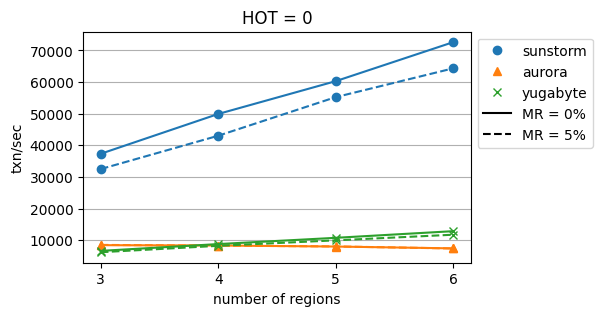

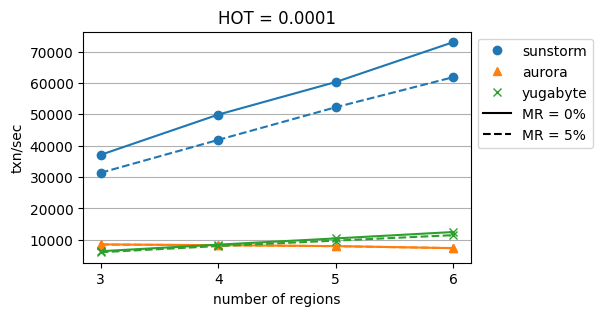

In [7]:
from matplotlib.lines import Line2D

# plt.rc('axes', labelsize=12) 
# plt.rc('legend', fontsize=11)

for hot in [1000000, 10000]:
    hot_df = throughput_df[throughput_df.hot == hot]
    hot_label = 0 if hot == 1000000 else f"{1/hot:.5f}".rstrip("0")
    ax = hot_df.pivot_table(
        index=["regions"], columns=["system", "mr"], values="throughput", aggfunc="sum"
    )[[
        ("sunstorm", 0),
        ("sunstorm", 5),
        ("aurora", 0),
        ("aurora", 5),
        ("yugabyte", 0),
        ("yugabyte", 5),
    ]].plot(
        title=f"HOT = {hot_label}",
        xlabel="number of regions",
        ylabel="txn/sec",
        figsize=(5, 3),
        rot=0,
        # logy=True,
        style={
            ("sunstorm", 0): "o-C0",
            ("sunstorm", 5): "o--C0",
            ("aurora", 0): "^-C1",
            ("aurora", 5): "^--C1",
            ("yugabyte", 0): "x-C2",
            ("yugabyte", 5): "x--C2",
        },
        xticks=range(3, 7),
    )
    # ax.margins(y=0.2)
    ax.grid(axis="y")

    legend_elements = [
        Line2D([0], [0], lw=0, marker='o', color='C0', markerfacecolor='C0', label='sunstorm'),
        Line2D([0], [0], lw=0, marker='^', color='C1', markerfacecolor='C1', label='aurora'),
        Line2D([0], [0], lw=0, marker='x', color='C2', markerfacecolor='C2', label='yugabyte'),
        Line2D([0], [0], color='k', linestyle='-', label='MR = 0%'),
        Line2D([0], [0], color='k', linestyle='--', label='MR = 5%'),
    ]

    plt.legend(
        handles=legend_elements, 
        title="",
        ncol=1,
        bbox_to_anchor=(1, 1),
        loc="upper left",
    )
    plt.savefig(f"output/scalability-hot{hot}.pdf", bbox_inches="tight")